# Importação de bibliotecas


In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from pandas import ExcelFile
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Mapeamento da tradução dos microdados


In [2]:
micro_dados = ExcelFile("../datasets/Dicionario_Microdados_Enem_2023.xlsx").sheet_names[
    1:-1
]

pprint(micro_dados)

['TP_SIT_FUNC_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_FAIXA_ETARIA',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025']


# Leitura traduções


In [3]:
df_micro_dados = {
    planilha: pd.read_excel(
        f"../datasets/Dicionario_Microdados_Enem_2023.xlsx",
        sheet_name=planilha,
        header=0,
    )
    for planilha in micro_dados
}

pprint(list(df_micro_dados.keys()))

['TP_SIT_FUNC_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_FAIXA_ETARIA',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025']


# Leitura dos microdados


In [86]:
MAXIMO = 1_000_000

df = pd.read_csv(
    "../datasets/MICRODADOS_ENEM_2020.csv", sep=";", encoding="ISO-8859-1", nrows=MAXIMO
)

df.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  200006271946    2020               11       F                1   
1  200001195856    2020               11       M                2   
2  200001943954    2020                4       F                2   
3  200001908998    2020                2       M                1   
4  200001634757    2020                4       F                1   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            2                 1                1               11          1   
1            3                 1                1               11          1   
2            3                 2                2                0          2   
3            3                 1                2                0          2   
4            3                 2                1                1          1   

   ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
0  ...   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN  
2  ...     B     A     A    B     A    A     A     A     A     A  
3  ...   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN   NaN  
4  ...     A     A     A    B     A    B     B     A     A     B  

[5 rows x 76 columns]

## Drop de colunas desnecessárias


In [87]:
df.drop(
    columns=[
        # Dados da prova objetiva
        "CO_PROVA_CN",
        "CO_PROVA_CH",
        "CO_PROVA_LC",
        "CO_PROVA_MT",
        "TX_RESPOSTAS_CN",
        "TX_RESPOSTAS_CH",
        "TX_RESPOSTAS_LC",
        "TX_RESPOSTAS_MT",
        "TX_GABARITO_CN",
        "TX_GABARITO_CH",
        "TX_GABARITO_LC",
        "TX_GABARITO_MT",
        # Dados da redação
        "NU_NOTA_COMP1",
        "NU_NOTA_COMP2",
        "NU_NOTA_COMP3",
        "NU_NOTA_COMP4",
        "NU_NOTA_COMP5",
    ],
    inplace=True,
)

# Cruzamento das traduções com os microdados


In [88]:
# for coluna in ["CO_MUNICIPIO_ESC", "CO_MUNICIPIO_PROVA", "CO_UF_ESC", "CO_UF_PROVA"]:
#     df[coluna] = df[coluna].replace(np.nan, 0).astype(int)

# for coluna in [
#     "NU_NOTA_CN",
#     "NU_NOTA_CH",
#     "NU_NOTA_LC",
#     "NU_NOTA_MT",
#     "NU_NOTA_REDACAO",
# ]:
#     df[coluna] = df[coluna].replace(np.nan, 0).astype(float)

# Dropar linhas com CO_MUNICIPIO_ESC nulo
df = df.dropna(subset=["CO_MUNICIPIO_ESC", "CO_MUNICIPIO_PROVA", "CO_UF_ESC", "CO_UF_PROVA"])

# for tabela in df_micro_dados:
#     df = df.merge(df_micro_dados[tabela], on=tabela)

# df = df.drop(columns=df_micro_dados.keys())

df.shape

(216565, 59)

In [89]:
df_saneamento = pd.read_csv("../datasets/br_mdr_snis_municipio_agua_esgoto.csv")

df_saneamento = df_saneamento[df_saneamento.ano == 2020].reset_index(drop=True)

df_saneamento.columns = df_saneamento.columns.str.upper()

df_saneamento.head()

ANO  ID_MUNICIPIO SIGLA_UF  POPULACAO_ATENDIDA_AGUA  \
0  2020       2905107       BA                   6942.0   
1  2020       2909505       BA                   3632.0   
2  2020       2910750       BA                  16076.0   
3  2020       2915106       BA                   9516.0   
4  2020       2917607       BA                  41625.0   

   POPULACAO_ATENTIDA_ESGOTO  POPULACAO_URBANA  \
0                      547.0            3193.0   
1                     2763.0            3376.0   
2                     8000.0            6992.0   
3                    12242.0            9577.0   
4                    15885.0           41639.0   

   POPULACAO_URBANA_RESIDENTE_AGUA  POPULACAO_URBANA_ATENDIDA_AGUA  \
0                           3193.0                          3193.0   
1                           3376.0                          3336.0   
2                           6992.0                          6975.0   
3                           9577.0                          9516.0   
4                          41639.0                         41625.0   

   POPULACAO_URBANA_ATENDIDA_AGUA_IBGE  POPULACAO_URBANA_RESIDENTE_ESGOTO  \
0                               9058.0                             3193.0   
1                               5351.0                             3376.0   
2                              17845.0                             6992.0   
3                              12242.0                             9577.0   
4                              54673.0                            41639.0   

   ...  INVESTIMENTO_RECURSO_ONEROSO_MUNICIPIO  \
0  ...                                     NaN   
1  ...                                     NaN   
2  ...                                     NaN   
3  ...                                     NaN   
4  ...                                     NaN   

   INVESTIMENTO_RECURSO_NAO_ONEROSO_MUNICIPIO  INVESTIMENTO_TOTAL_MUNICIPIO  \
0                                         NaN                           NaN   
1                                         NaN                           NaN   
2                                         NaN                     228725.81   
3                                         NaN                      74000.00   
4                                         NaN                           NaN   

   INVESTIMENTO_AGUA_ESTADO  INVESTIMENTO_ESGOTO_ESTADO  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       NaN                         NaN   

   INVESTIMENTO_OUTRO_ESTADO  INVESTIMENTO_RECURSO_PROPRIO_ESTADO  \
0                        NaN                                  NaN   
1                        NaN                                  NaN   
2                        0.0                                  0.0   
3                        0.0                                  0.0   
4                        NaN                                  NaN   

   INVESTIMENTO_RECURSO_ONEROSO_ESTADO  \
0                                  NaN   
1                                  NaN   
2                                  0.0   
3                                  0.0   
4                                  NaN   

   INVESTIMENTO_RECURSO_NAO_ONEROSO_ESTADO  INVESTIMENTO_TOTAL_ESTADO  
0                                      NaN                        NaN  
1                                      NaN                        NaN  
2                                      0.0                        0.0  
3                                      0.0                        0.0  
4                                      NaN                        NaN  

[5 rows x 133 columns]

## Munícipios que tiveram prova do ENEM mas que não estão na pesquisa


In [45]:
df.CO_MUNICIPIO_PROVA.nunique()

1743

In [46]:
df_saneamento.ID_MUNICIPIO.nunique()

5338

In [47]:
df.CO_MUNICIPIO_PROVA.nunique() - df_saneamento.ID_MUNICIPIO.nunique()

-3595

In [82]:
df[~df.CO_MUNICIPIO_PROVA.isin(df_saneamento.ID_MUNICIPIO)]

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
2205    200002145149    2020                2       F                1   
3210    200001431391    2020                2       M                1   
4288    200003055872    2020                2       M                1   
5077    200001534216    2020                5       M                1   
5273    200003016508    2020                2       F                1   
...              ...     ...              ...     ...              ...   
995126  200005667924    2020                1       M                1   
996491  200006834155    2020                2       M                1   
997324  200002125237    2020                4       F                1   
999010  200004191118    2020                4       F                1   
999460  200003744701    2020                2       M                1   

        TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
2205              3                 1                2                0   
3210              2                 1                2                0   
4288              2                 1                2                0   
5077              2                 1                2                0   
5273              3                 1                2                0   
...             ...               ...              ...              ...   
995126            1                 1                2                0   
996491            3                 1                2                0   
997324            1                 1                2                0   
999010            3                 1                2                0   
999460            3                 1                2                0   

        TP_ESCOLA  ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  \
2205            2  ...     A     A     A    B     A    A     C     A     B   
3210            2  ...     A     A     A    B     A    A     D     A     A   
4288            2  ...     A     A     A    B     A    A     C     A     B   
5077            2  ...     A     A     A    B     A    A     D     A     B   
5273            2  ...     B     A     A    B     A    B     B     A     B   
...           ...  ...   ...   ...   ...  ...   ...  ...   ...   ...   ...   
995126          2  ...     A     A     A    B     A    A     B     A     B   
996491          2  ...     A     A     A    B     B    A     B     A     A   
997324          2  ...     A     A     A    B     A    A     C     A     A   
999010          2  ...     A     A     A    B     B    A     B     A     B   
999460          2  ...     A     A     A    B     A    A     C     A     A   

        Q025  
2205       A  
3210       B  
4288       B  
5077       B  
5273       B  
...      ...  
995126     B  
996491     A  
997324     B  
999010     B  
999460     B  

[1334 rows x 59 columns]

In [83]:
df[~df.CO_MUNICIPIO_PROVA.isin(df_saneamento.ID_MUNICIPIO)].shape[0] / df.shape[0] * 100

0.6159813450926974

# Q1. A cobertura de abastecimento de água (indice_atendimento_total_agua) explica diferenças na nota média de redação?


In [110]:
df_calculo_morador = df.copy()

df_calculo_morador = df_calculo_morador[df_calculo_morador["CO_MUNICIPIO_ESC"] != 0]
df_calculo_morador = df_calculo_morador[df_calculo_morador["IN_TREINEIRO"] == 0]
df_calculo_morador = df_calculo_morador[df_calculo_morador["TP_STATUS_REDACAO"] == 1]
df_calculo_morador = df_calculo_morador[df_calculo_morador["TP_PRESENCA_CN"] == 1]
df_calculo_morador = df_calculo_morador[df_calculo_morador["TP_PRESENCA_CH"] == 1]
df_calculo_morador = df_calculo_morador[df_calculo_morador["TP_PRESENCA_LC"] == 1]
df_calculo_morador = df_calculo_morador[df_calculo_morador["TP_PRESENCA_MT"] == 1]

nota_cols = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

df_calculo_morador.dropna(subset=nota_cols, inplace=True)

df_calculo_morador["NU_NOTA_TOTAL_INDIVIDUAL"] = df_calculo_morador[nota_cols].sum(
    axis=1
)

df_agregado_municipio = (
    df_calculo_morador.groupby(["CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC"])
    .agg(
        SOMA_NOTAS_TOTAIS_MUNICIPIO=("NU_NOTA_TOTAL_INDIVIDUAL", "sum"),
        POPULACAO_CALCULO=("NU_INSCRICAO", "nunique")
    )
    .reset_index()
)

df_final_morador = df_agregado_municipio[df_agregado_municipio["POPULACAO_CALCULO"] > 0].copy()

df_final_morador["SOMA_NOTAS_POR_MORADOR"] = (
    df_final_morador["SOMA_NOTAS_TOTAIS_MUNICIPIO"]
    / df_final_morador["POPULACAO_CALCULO"]
)


df_final_morador["SOMA_NOTAS_POR_MORADOR"] = (
    df_final_morador["SOMA_NOTAS_POR_MORADOR"] / 4
)

df_final_morador = df_final_morador.merge(
    df_saneamento,
    left_on="CO_MUNICIPIO_ESC",
    right_on="ID_MUNICIPIO",
    how="inner",
)

df_final_morador


CO_MUNICIPIO_ESC       NO_MUNICIPIO_ESC  SOMA_NOTAS_TOTAIS_MUNICIPIO  \
0            1100015.0  Alta Floresta D'Oeste                      62808.5   
1            1100023.0              Ariquemes                     263808.0   
2            1100031.0                 Cabixi                       7383.3   
3            1100049.0                 Cacoal                     219031.6   
4            1100056.0             Cerejeiras                      22566.4   
...                ...                    ...                          ...   
4232         5221858.0    Valparaíso de Goiás                     306169.0   
4233         5221908.0                 Varjão                       2439.3   
4234         5222005.0             Vianópolis                      20531.4   
4235         5222302.0          Vila Propício                       2359.4   
4236         5300108.0               Brasília                   10914152.8   

      POPULACAO_CALCULO  SOMA_NOTAS_POR_MORADOR   ANO  ID_MUNICIPIO SIGLA_UF  \
0                    22              713.732955  2020       1100015       RO   
1                   100              659.520000  2020       1100023       RO   
2                     3              615.275000  2020       1100031       RO   
3                    77              711.141558  2020       1100049       RO   
4                     9              626.844444  2020       1100056       RO   
...                 ...                     ...   ...           ...      ...   
4232                117              654.207265  2020       5221858       GO   
4233                  1              609.825000  2020       5221908       GO   
4234                  8              641.606250  2020       5222005       GO   
4235                  1              589.850000  2020       5222302       GO   
4236               3856              707.608454  2020       5300108       DF   

      POPULACAO_ATENDIDA_AGUA  POPULACAO_ATENTIDA_ESGOTO  ...  \
0                     10716.0                        NaN  ...   
1                     92761.0                     2280.0  ...   
2                      2332.0                        NaN  ...   
3                     67689.0                    46252.0  ...   
4                     10284.0                    13821.0  ...   
...                       ...                        ...  ...   
4232                 170493.0                    87202.0  ...   
4233                   2394.0                        NaN  ...   
4234                  10262.0                        NaN  ...   
4235                   1719.0                        NaN  ...   
4236                3024598.0                  2777130.0  ...   

      INVESTIMENTO_RECURSO_ONEROSO_MUNICIPIO  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
4232                                     NaN   
4233                                     NaN   
4234                                     NaN   
4235                                     NaN   
4236                                     0.0   

      INVESTIMENTO_RECURSO_NAO_ONEROSO_MUNICIPIO  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
4232                                         NaN   
4233                                         NaN   
4234                                         NaN   
4235                                         NaN   
4236                                         0.0   

      INVESTIMENTO_TOTAL_MUNICIPIO  INVESTIMENTO_AGUA_ESTADO  \
0                              0.0                       0.0 

In [94]:
def plot_scatter(df: pd.DataFrame, x: str, y: str, ylabel: str) -> None:
    cols = [x, y]
    df_plot = df[cols].apply(pd.to_numeric, errors="coerce").dropna()

    X = df_plot[x]
    Y = df_plot[y]

    slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
    line_x = np.linspace(X.min(), X.max(), 200)
    line_y = intercept + slope * line_x

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(X, Y, alpha=0.6, edgecolor="k", label="Municipios")
    ax.plot(
        line_x,
        line_y,
        color="red",
        linewidth=2,
        label=f"y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.3f}",
    )

    ax.set_xlabel("Índice de atendimento total de água (%)", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(f"Cobertura de água vs. {ylabel}", fontsize=14, pad=12)
    ax.legend(frameon=False)
    ax.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

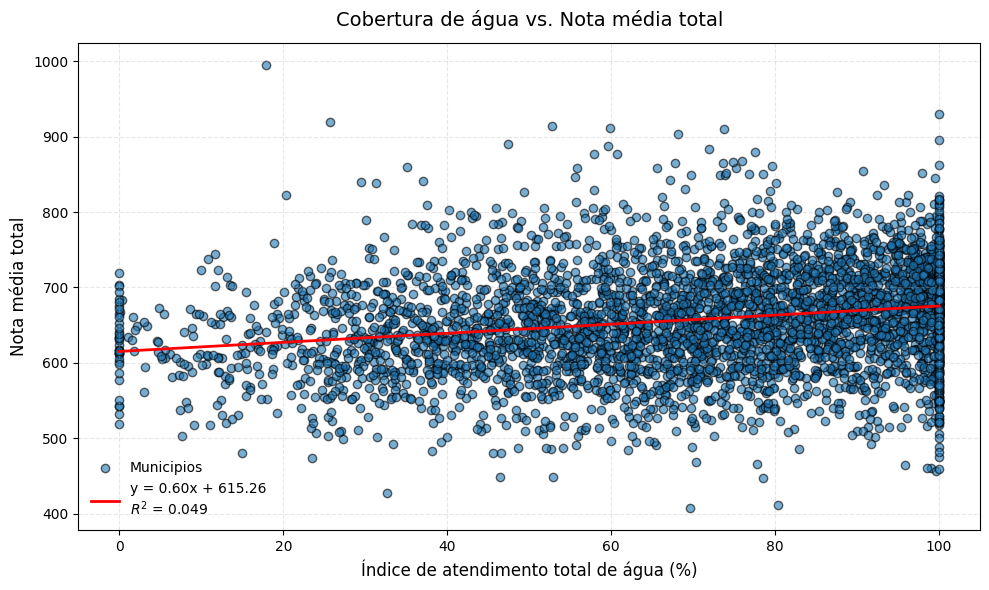

In [111]:
coluna_notas = {
    "SOMA_NOTAS_POR_MORADOR": "Nota média total",
}

for nota in coluna_notas:
    plot_scatter(
        df_final_morador,
        x="INDICE_ATENDIMENTO_TOTAL_AGUA",
        y=nota,
        ylabel=coluna_notas[nota],
    )

# Q2. Municípios com altas perdas na distribuição têm menor taxa de comparecimento ao exame?


In [18]:
df_q2 = df.copy()
df_q2 = df_q2[df_q2.CO_MUNICIPIO_ESC != 0]
df_q2 = df_q2[df_q2.IN_TREINEIRO == 0]

df_q2["NAO_COMPARECEU_PELO_MENOS_1_DIA"] = (
    (df_q2.TP_PRESENCA_LC == 0)
    | (df_q2.TP_PRESENCA_CH == 0)
    | (df_q2.TP_PRESENCA_CN == 0)
    | (df_q2.TP_PRESENCA_MT == 0)
)

df_q2_group = (
    df_q2[df_q2.NAO_COMPARECEU_PELO_MENOS_1_DIA]
    .groupby(["CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC"])
    .agg(
        NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT=(
            "NAO_COMPARECEU_PELO_MENOS_1_DIA",
            "sum",
        ),
        TOTAL=("NU_INSCRICAO", "count"),
    )
    .reset_index()
)

df_q2_group["TAXA_FALTA"] = (
    df_q2_group["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"] / df_q2_group["TOTAL"]
) * 100

df_q2_merged = df_q2_group.merge(
    df_saneamento, left_on="CO_MUNICIPIO_ESC", right_on="ID_MUNICIPIO"
).drop(columns=["ANO", "ID_MUNICIPIO"])[
    df_q2_group.columns.to_list() + ["INDICE_PERDA_DISTRIBUICAO_AGUA"]
]

df_q2_merged = df_q2_merged[df_q2_merged.INDICE_PERDA_DISTRIBUICAO_AGUA >= 80]

df_q2_merged.head()

CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT  \
16            1100205      Porto Velho                                    304   
58            1200609         Tarauacá                                     16   
61            1300029         Alvarães                                      1   
103           1400233          Caroebe                                      2   
105           1400456        Pacaraima                                      1   

     TOTAL  TAXA_FALTA  INDICE_PERDA_DISTRIBUICAO_AGUA  
16     304       100.0                           84.01  
58      16       100.0                           80.87  
61       1       100.0                           83.16  
103      2       100.0                           82.03  
105      1       100.0                           82.73

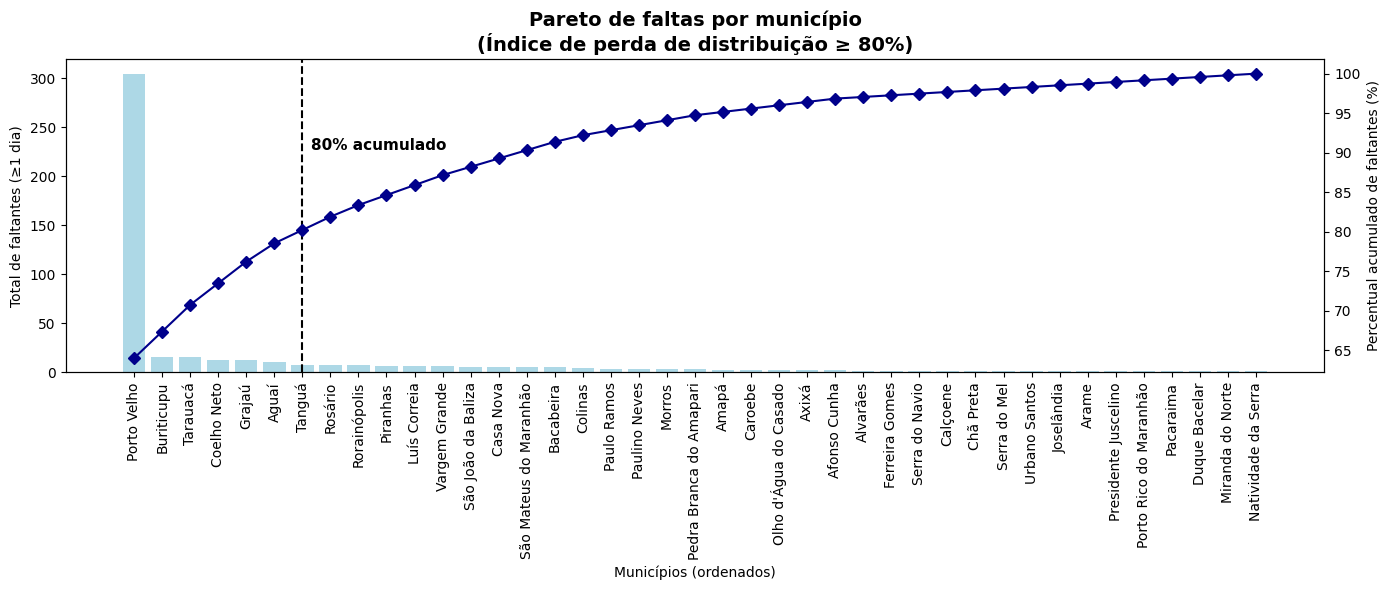

In [19]:
df_plot = df_q2_merged[
    ["NO_MUNICIPIO_ESC", "NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"]
].copy()
df_plot = df_plot.sort_values("NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT", ascending=False)
df_plot["CUMULATIVE_PERCENT"] = (
    df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"].cumsum()
    / df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"].sum()
) * 100

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(
    df_plot["NO_MUNICIPIO_ESC"],
    df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"],
    color="lightblue",
)
ax.set_ylabel("Total de faltantes (≥1 dia)")
ax.set_xlabel("Municípios (ordenados)")

idx_80 = df_plot["CUMULATIVE_PERCENT"].ge(80).idxmax()
x_80 = df_plot.index.get_loc(idx_80)

ymax = ax.get_ylim()[1]

ax.axvline(x=x_80, linestyle="--", color="black")
ax.text(
    x_80 + 0.3,
    ymax * 0.7,
    r"80% acumulado",
    va="bottom",
    ha="left",
    fontdict={"size": 11, "weight": "bold"},
)

ax.set_xticks(range(len(df_plot)))
ax.set_xticklabels(df_plot["NO_MUNICIPIO_ESC"], rotation=90)

ax2 = ax.twinx()
ax2.plot(
    df_plot["NO_MUNICIPIO_ESC"],
    df_plot["CUMULATIVE_PERCENT"],
    marker="D",
    linestyle="-",
    color="darkblue",
)
ax2.set_ylabel("Percentual acumulado de faltantes (%)")

plt.title(
    "Pareto de faltas por município\n(Índice de perda de distribuição ≥ 80%)",
    fontsize=14,
    fontdict={"weight": "bold"},
)
plt.tight_layout()
plt.show()

In [20]:
df_q2[df_q2.NO_MUNICIPIO_ESC == "Porto Velho"].shape[0]

862

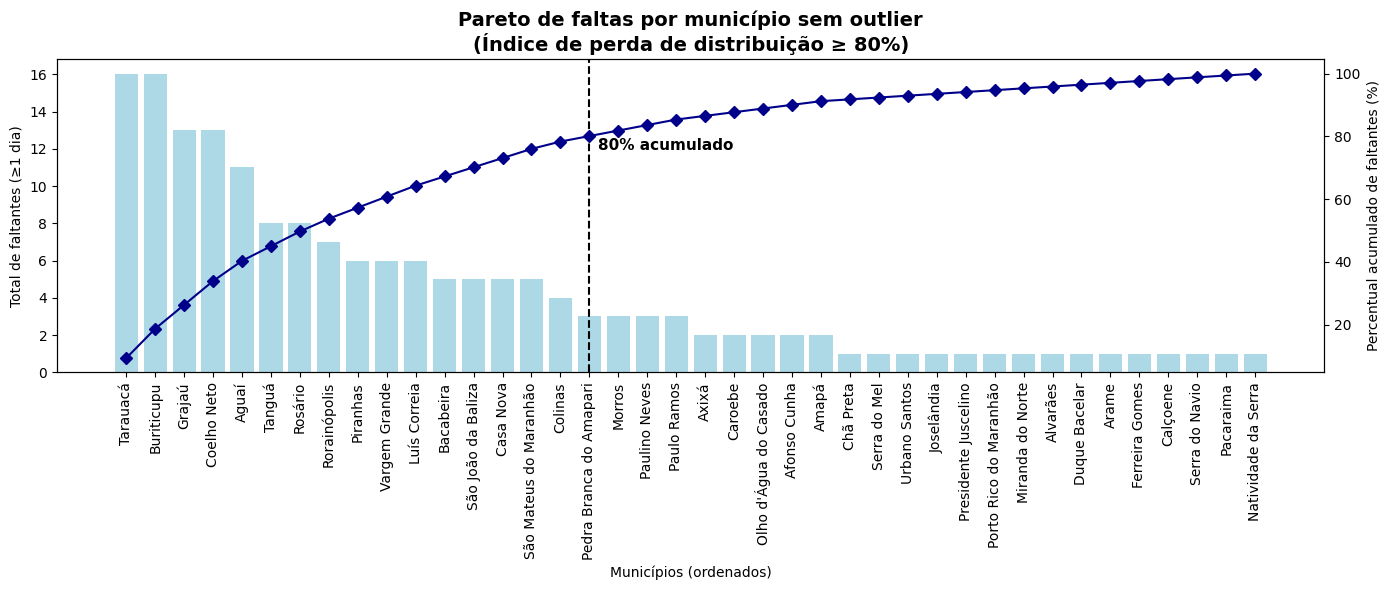

In [21]:
df_plot = df_q2_merged[df_q2_merged.NO_MUNICIPIO_ESC != "Porto Velho"][
    ["NO_MUNICIPIO_ESC", "NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"]
].copy()
df_plot = df_plot.sort_values("NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT", ascending=False)
df_plot["CUMULATIVE_PERCENT"] = (
    df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"].cumsum()
    / df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"].sum()
) * 100

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(
    df_plot["NO_MUNICIPIO_ESC"],
    df_plot["NAO_COMPARECEU_PELO_MENOS_1_DIA_COUNT"],
    color="lightblue",
)
ax.set_ylabel("Total de faltantes (≥1 dia)")
ax.set_xlabel("Municípios (ordenados)")

idx_80 = df_plot["CUMULATIVE_PERCENT"].ge(80).idxmax()
x_80 = df_plot.index.get_loc(idx_80)

ymax = ax.get_ylim()[1]

ax.axvline(x=x_80, linestyle="--", color="black")
ax.text(
    x_80 + 0.3,
    ymax * 0.7,
    r"80% acumulado",
    va="bottom",
    ha="left",
    fontdict={"size": 11, "weight": "bold"},
)

ax.set_xticks(range(len(df_plot)))
ax.set_xticklabels(df_plot["NO_MUNICIPIO_ESC"], rotation=90)

ax2 = ax.twinx()
ax2.plot(
    df_plot["NO_MUNICIPIO_ESC"],
    df_plot["CUMULATIVE_PERCENT"],
    marker="D",
    linestyle="-",
    color="darkblue",
)
ax2.set_ylabel("Percentual acumulado de faltantes (%)")

plt.title(
    "Pareto de faltas por município sem outlier\n(Índice de perda de distribuição ≥ 80%)",
    fontsize=14,
    fontdict={"weight": "bold"},
)
plt.tight_layout()
plt.show()

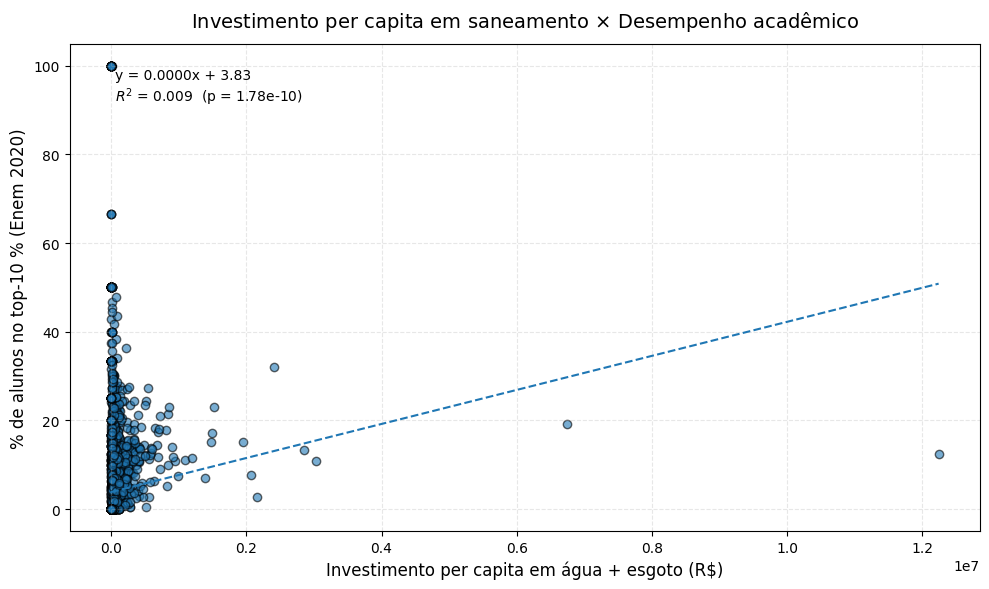

In [31]:
df_q3 = df.copy()
df_q3 = df_q3[df_q3.CO_MUNICIPIO_ESC != 0]
df_q3 = df_q3[df_q3.IN_TREINEIRO == 0]

nota_cols = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

df_q3["NU_NOTA_TOTAL"] = df_q3[nota_cols].sum(axis=1, min_count=len(nota_cols))
df_q3 = df_q3.dropna(subset=["NU_NOTA_TOTAL", "CO_MUNICIPIO_ESC"])

limiar_top10 = np.percentile(df_q3["NU_NOTA_TOTAL"], 90)

# % de alunos no top‑10 % por município --------------------------
df_top10 = (
    df_q3.groupby("CO_MUNICIPIO_ESC")
    .agg(
        INSCRITOS=("NU_INSCRICAO", "size"),
        TOP10_COUNT=("NU_NOTA_TOTAL", lambda x: (x >= limiar_top10).sum()),
    )
    .reset_index()
)
df_top10["PCT_TOP10"] = df_top10["TOP10_COUNT"] / df_top10["INSCRITOS"] * 100

df_sani = df_saneamento[["ID_MUNICIPIO", "POPULACAO_ATENDIDA_AGUA"]].rename(
    columns={"ID_MUNICIPIO": "CO_MUNICIPIO_ESC"}
)
# df_sani["INVEST_PER_CAPITA"] = (
#     df_sani["INVESTIMENTO_TOTAL_MUNICIPIO"] / df_sani["POPULACAO_URBANA"]
# )

df_merged = (
    df_top10.merge(df_sani, on="CO_MUNICIPIO_ESC")
    .replace([np.inf, -np.inf], np.nan)
    .dropna(subset=["POPULACAO_ATENDIDA_AGUA", "PCT_TOP10"])
)

# df_merged = df_merged[df_merged.INVEST_PER_CAPITA < 5000]

X = df_merged["POPULACAO_ATENDIDA_AGUA"]
Y = df_merged["PCT_TOP10"]

slope, intercept, r, p, se = stats.linregress(X, Y)
line_x = np.linspace(X.min(), X.max(), 200)
line_y = intercept + slope * line_x

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X, Y, alpha=0.6, edgecolor="k")
ax.plot(line_x, line_y, linestyle="--")

ax.set_xlabel(r"Investimento per capita em água + esgoto (R$)", fontsize=12)
ax.set_ylabel(r"% de alunos no top-10 % (Enem 2020)", fontsize=12)
ax.set_title(
    r"Investimento per capita em saneamento $\times$ Desempenho acadêmico",
    fontsize=14,
    pad=12,
)
ax.text(
    0.05,
    0.95,
    f"y = {slope:.4f}x + {intercept:.2f}\n"
    + r"$R^2$"
    + f" = {r**2:.3f}  (p = {p:.3g})",
    transform=ax.transAxes,
    va="top",
    fontsize=10,
)

ax.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

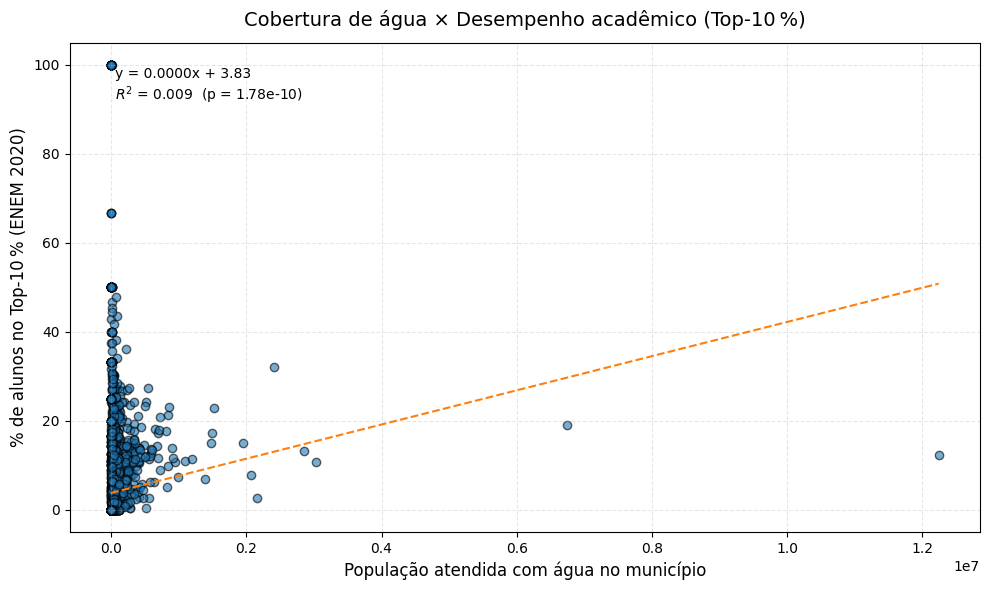

In [33]:
# ---------------------------------------------------------------
# % de alunos no Top‑10 %  ×  População atendida com água
# ---------------------------------------------------------------
df_q3 = df.copy()
df_q3 = df_q3[df_q3.CO_MUNICIPIO_ESC != 0]
df_q3 = df_q3[df_q3.IN_TREINEIRO == 0]

# ── Nota total e limiar do Top‑10 % ─────────────────────────────
nota_cols = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

df_q3["NU_NOTA_TOTAL"] = df_q3[nota_cols].sum(axis=1, min_count=len(nota_cols))
df_q3 = df_q3.dropna(subset=["NU_NOTA_TOTAL", "CO_MUNICIPIO_ESC"])

limiar_top10 = np.percentile(df_q3["NU_NOTA_TOTAL"], 90)

df_top10 = (
    df_q3.groupby("CO_MUNICIPIO_ESC")
    .agg(
        INSCRITOS=("NU_INSCRICAO", "size"),
        TOP10_COUNT=("NU_NOTA_TOTAL", lambda x: (x >= limiar_top10).sum()),
    )
    .reset_index()
)
df_top10["PCT_TOP10"] = df_top10["TOP10_COUNT"] / df_top10["INSCRITOS"] * 100

# ── População atendida com água ────────────────────────────────
df_sani = df_saneamento[["ID_MUNICIPIO", "POPULACAO_ATENDIDA_AGUA"]].rename(
    columns={"ID_MUNICIPIO": "CO_MUNICIPIO_ESC"}
)

df_merged = (
    df_top10.merge(df_sani, on="CO_MUNICIPIO_ESC")
    .replace([np.inf, -np.inf], np.nan)
    .dropna(subset=["POPULACAO_ATENDIDA_AGUA", "PCT_TOP10"])
)

# ── Regressão linear simples ───────────────────────────────────
X = df_merged["POPULACAO_ATENDIDA_AGUA"]
Y = df_merged["PCT_TOP10"]

slope, intercept, r, p, se = stats.linregress(X, Y)
line_x = np.linspace(X.min(), X.max(), 200)
line_y = intercept + slope * line_x

# ── Plot ───────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X, Y, alpha=0.6, edgecolor="k")
ax.plot(line_x, line_y, linestyle="--", color="tab:orange")

ax.set_xlabel("População atendida com água no município", fontsize=12)
ax.set_ylabel("% de alunos no Top‑10 % (ENEM 2020)", fontsize=12)
ax.set_title("Cobertura de água × Desempenho acadêmico (Top‑10 %)", fontsize=14, pad=12)

ax.text(
    0.05,
    0.95,
    f"y = {slope:.4f}x + {intercept:.2f}\n" r"$R^2$" + f" = {r**2:.3f}  (p = {p:.3g})",
    transform=ax.transAxes,
    va="top",
    fontsize=10,
)

ax.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
df_q3 = df.copy()
df_q3 = df_q3[df_q3.CO_MUNICIPIO_ESC != 0]
df_q3 = df_q3[df_q3.IN_TREINEIRO == 0]

df_q3["COMPARECEU_TODOS_DIAS"] = (
    (df_q3.TP_PRESENCA_LC != 0)
    & (df_q3.TP_PRESENCA_CH != 0)
    & (df_q3.TP_PRESENCA_CN != 0)
    & (df_q3.TP_PRESENCA_MT != 0)
)

df_q3 = (
    df_q3[df_q3.COMPARECEU_TODOS_DIAS]
    .groupby("CO_MUNICIPIO_ESC")
    .agg(
        NU_NOTA_CN_MEAN=("NU_NOTA_CN", "mean"),
        NU_NOTA_CH_MEAN=("NU_NOTA_CH", "mean"),
        NU_NOTA_LC_MEAN=("NU_NOTA_LC", "mean"),
        NU_NOTA_MT_MEAN=("NU_NOTA_MT", "mean"),
        NU_NOTA_REDACAO_MEAN=("NU_NOTA_REDACAO", "mean"),
    )
    .reset_index()
)

df_q3

CO_MUNICIPIO_ESC  NU_NOTA_CN_MEAN  NU_NOTA_CH_MEAN  NU_NOTA_LC_MEAN  \
0              1100015       515.045455       549.354545       546.322727   
1              1100023       488.038000       510.432000       524.336000   
2              1100031       493.366667       487.233333       537.366667   
3              1100049       502.092593       540.862963       539.690123   
4              1100056       440.455556       484.733333       497.688889   
...                ...              ...              ...              ...   
4414           5221908       434.500000       416.900000       441.200000   
4415           5222005       466.675000       482.587500       528.187500   
4416           5222054       499.825000       548.325000       563.875000   
4417           5222302       394.900000       493.700000       500.300000   
4418           5300108       515.814833       546.655861       557.608766   

      NU_NOTA_MT_MEAN  NU_NOTA_REDACAO_MEAN  
0          539.663636            704.545455  
1          514.474000            600.800000  
2          469.800000            473.333333  
3          546.479012            654.814815  
4          508.944444            575.555556  
...               ...                   ...  
4414       446.700000            700.000000  
4415       506.475000            582.500000  
4416       554.575000            555.000000  
4417       430.500000            540.000000  
4418       554.786504            646.740360  

[4419 rows x 6 columns]

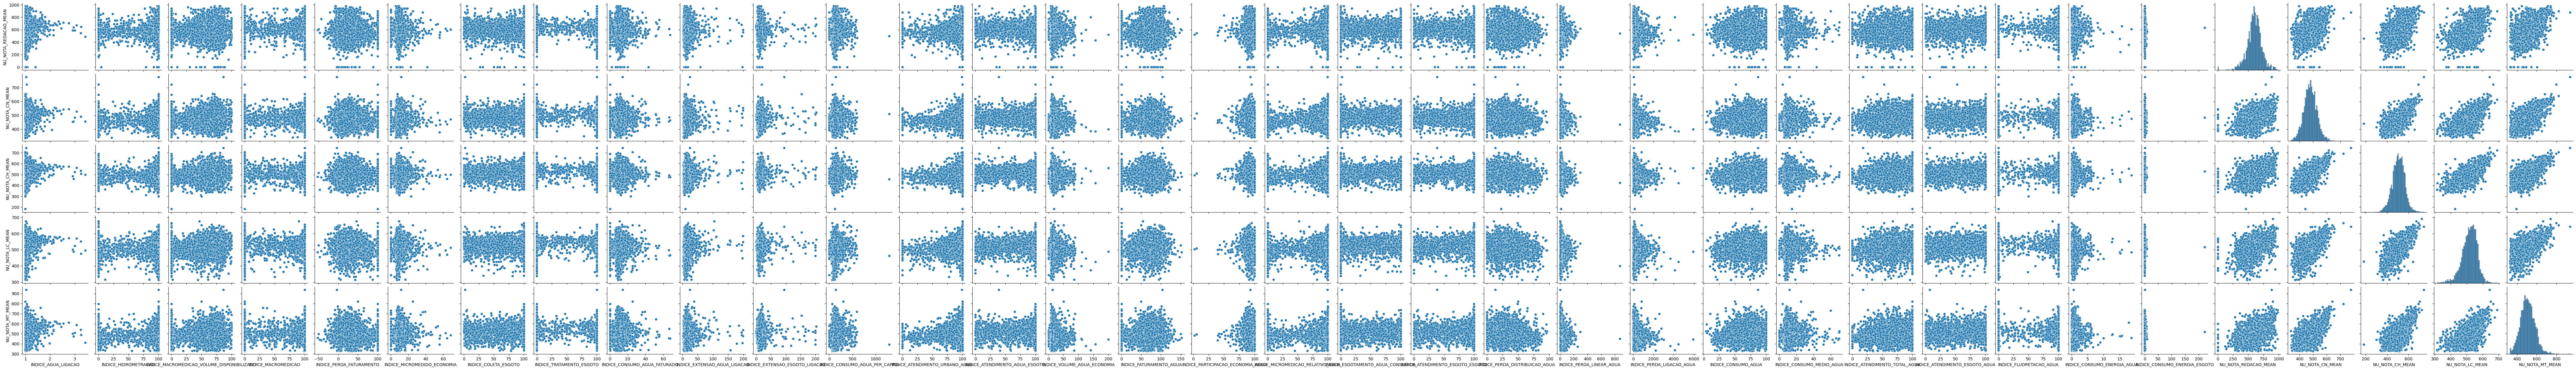

In [54]:
df_test = df_q3.merge(
    df_saneamento, left_on="CO_MUNICIPIO_ESC", right_on="ID_MUNICIPIO", how="left"
)

sns.pairplot(
    df_test[
        [x for x in df_test.columns.to_list() if "INDICE" in x]
        + [
            "NU_NOTA_REDACAO_MEAN",
            "NU_NOTA_CN_MEAN",
            "NU_NOTA_CH_MEAN",
            "NU_NOTA_LC_MEAN",
            "NU_NOTA_MT_MEAN",
        ]
    ],
    y_vars=[
        "NU_NOTA_REDACAO_MEAN",
        "NU_NOTA_CN_MEAN",
        "NU_NOTA_CH_MEAN",
        "NU_NOTA_LC_MEAN",
        "NU_NOTA_MT_MEAN",
    ],
)

In [ ]:
# Merge das médias das notas com a população atendida por município
notas_pop = df_q3.merge(
    df_saneamento[["ID_MUNICIPIO", "POPULACAO_ATENDIDA_AGUA"]],
    left_on="CO_MUNICIPIO_ESC",
    right_on="ID_MUNICIPIO",
    how="left"
)

# Para cada nota média, calcular a média ponderada considerando a população
notas_cols = [
    "NU_NOTA_CN_MEAN",
    "NU_NOTA_CH_MEAN",
    "NU_NOTA_LC_MEAN",
    "NU_NOTA_MT_MEAN",
    "NU_NOTA_REDACAO_MEAN",
]

media_ponderada = {}
for col in notas_cols:
    soma_ponderada = (notas_pop[col] * notas_pop["POPULACAO_ATENDIDA_AGUA"]).sum()
    soma_pesos = notas_pop["POPULACAO_ATENDIDA_AGUA"].sum()
    media_ponderada[col] = soma_ponderada / soma_pesos

print("Médias ponderadas das notas por município (pesadas pela população atendida):")
for nota, valor in media_ponderada.items():
    print(f"{nota}: {valor:.2f}")
